# MANUFACTURING DATASET
#### This report presents an analysis of a manufacturing dataset, which simulates real-world data collected from a manufacturing process. The dataset is designed to explore the relationships between various process parameters and product quality. It contains both feature variables that represent process conditions and a target variable that represents the quality rating of the manufactured items.
### DESCRIPTION
#### The manufacturing dataset consists of the following columns:
##### Temperature (°C): represents the temperature during the manufacturing process, influencing material properties and product quality.
##### Pressure (kPa): The pressure applied during the manufacturing process. 
##### Temperature x Pressure: This feature is an interaction term between temperature and pressure, which captures the combined effect of these two process parameters.
##### Material Fusion Metric: A derived metric calculated as the sum of the square of temperature and the cube of pressure. 
##### Material Transformation Metric: Another derived metric calculated as the cube of temperature minus the square of pressure. 
##### Quality Rating: The target variable, 'Quality Rating,' represents the overall quality rating of the produced items. Quality is a crucial aspect of manufacturing, and this rating serves as a measure of the final product's quality.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn import metrics
from sklearn.metrics import r2_score

### Import Data

In [2]:
df = pd.read_csv("https://github.com/JUBINA-23/ML-PROJECT-2/blob/main/manufacturing.csv")
data = pd.DataFrame(df)
print(data)

      Temperature (°C)  Pressure (kPa)  Temperature x Pressure  \
0           209.762701        8.050855             1688.769167   
1           243.037873       15.812068             3842.931469   
2           220.552675        7.843130             1729.823314   
3           208.976637       23.786089             4970.736918   
4           184.730960       15.797812             2918.345014   
...                ...             ...                     ...   
3952        156.811578       21.794290             3417.596965   
3953        197.850406        8.291704             1640.516924   
3954        241.357144       16.391910             3956.304672   
3955        209.040239       23.809936             4977.234763   
3956        163.359996       24.332133             3974.897121   

      Material Fusion Metric  Material Transformation Metric  Quality Rating  
0               44522.217074                    9.229576e+06       99.999971  
1               63020.764997                    1

### Basic Information

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


### Data Cleaning

#### Rename Attributes

In [4]:
data.rename(columns = {'Temperature (°C)':'temp', 'Pressure (kPa)':'pressure', 'Temperature x Pressure':'temp*pressure', 
                       'Material Fusion Metric':'material_fusion_metric', 'Material Transformation Metric':'material_transformation_metric','Quality Rating':'quality_rating'}, inplace = True)

#### Check Null Values

In [5]:
print(data.isna().sum())        # no null values

temp                              0
pressure                          0
temp*pressure                     0
material_fusion_metric            0
material_transformation_metric    0
quality_rating                    0
dtype: int64


#### Check Duplicates

In [6]:
print(data.duplicated())         # no duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
3952    False
3953    False
3954    False
3955    False
3956    False
Length: 3957, dtype: bool


### Check Outliers

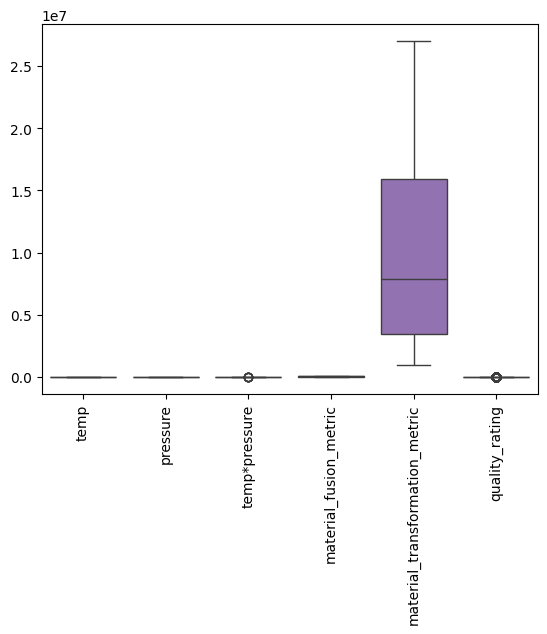

In [7]:
# finding outliers using boxplot from seaborn 
sns.boxplot(data)           
plt.xticks(rotation = 90)
plt.show()

### Statistical Analysis

In [8]:
print(data.describe(include='all'))

              temp     pressure  temp*pressure  material_fusion_metric  \
count  3957.000000  3957.000000    3957.000000             3957.000000   
mean    200.034704    14.815558    2955.321308            48127.183128   
std      58.135717     5.772040    1458.224940            23812.213513   
min     100.014490     5.003008     513.706875            10156.971955   
25%     150.871296     9.692984    1798.247303            27626.929091   
50%     198.603371    14.832557    2678.277782            44611.452164   
75%     251.366552    19.749680    3929.058261            67805.443846   
max     299.992804    24.999132    7365.018714           103756.181544   

       material_transformation_metric  quality_rating  
count                    3.957000e+03     3957.000000  
mean                     1.003645e+07       96.260179  
std                      7.599356e+06       12.992262  
min                      9.999462e+05        1.000000  
25%                      3.433810e+06       99.941129

#### Correlation

                                 temp  pressure  temp*pressure  \
temp                            1.000    -0.025          0.572   
pressure                       -0.025     1.000          0.774   
temp*pressure                   0.572     0.774          1.000   
material_fusion_metric          0.975     0.151          0.695   
material_transformation_metric  0.971    -0.023          0.556   
quality_rating                 -0.461     0.013         -0.258   

                                material_fusion_metric  \
temp                                             0.975   
pressure                                         0.151   
temp*pressure                                    0.695   
material_fusion_metric                           1.000   
material_transformation_metric                   0.977   
quality_rating                                  -0.512   

                                material_transformation_metric  quality_rating  
temp                                             

<Axes: >

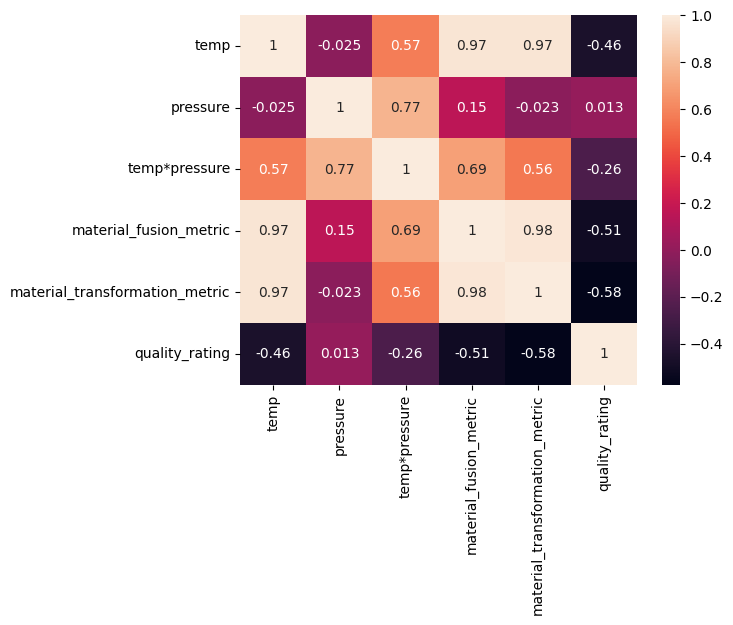

In [9]:
corre = data.corr(numeric_only=True)
print(np.around(corre, decimals = 2))

# plot
sns.heatmap(corre,annot=True)

#### Covariance

                                        temp     pressure  temp*pressure  \
temp                            3.379762e+03       -8.307   4.846949e+04   
pressure                       -8.307000e+00       33.316   6.511107e+03   
temp*pressure                   4.846949e+04     6511.107   2.126420e+06   
material_fusion_metric          1.349594e+06    20767.294   2.412361e+07   
material_transformation_metric  4.290748e+08 -1002800.638   6.156690e+09   
quality_rating                 -3.484100e+02        0.985  -4.896953e+03   

                                material_fusion_metric  \
temp                                      1.349594e+06   
pressure                                  2.076729e+04   
temp*pressure                             2.412361e+07   
material_fusion_metric                    5.670215e+08   
material_transformation_metric            1.767427e+11   
quality_rating                           -1.583909e+05   

                                material_transformation_metr

<Axes: >

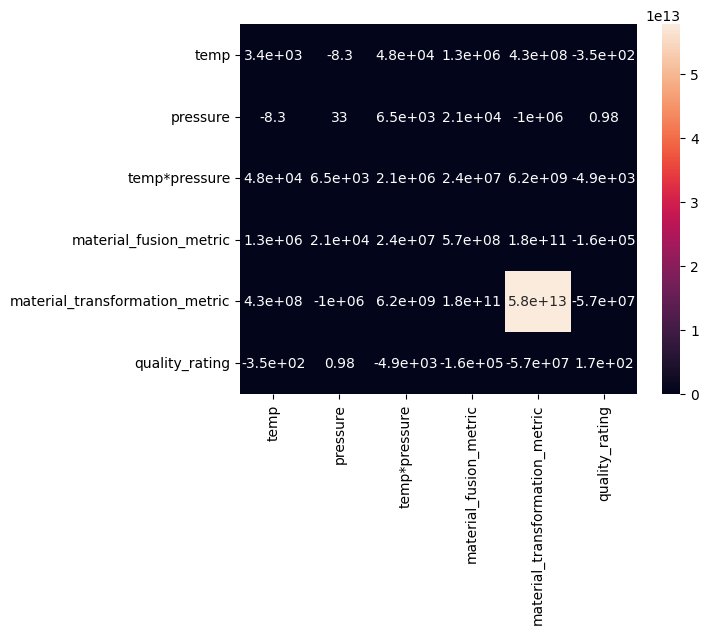

In [10]:
cova = data.cov(numeric_only=True)
print(np.around(cova, decimals = 2))

# plot
sns.heatmap(cova,annot=True)

### Extract Dependent and Independent Variables

In [11]:
x = data[['temp', 'material_fusion_metric', 'material_transformation_metric']]        # independent var
y = data['quality_rating']    # dependent var

### Split Train and Test Data

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Build Model

#### Scatter Plot

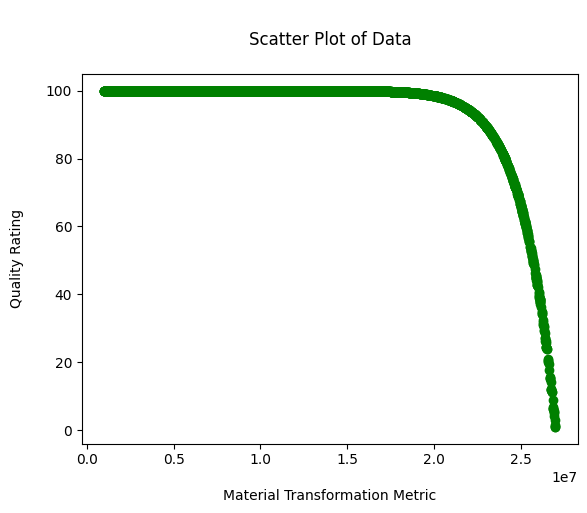

In [13]:
# plot graph
plt.scatter(data['material_transformation_metric'], y, color="g")
plt.xlabel("\nMaterial Transformation Metric")
plt.ylabel("Quality Rating\n")
plt.title("\nScatter Plot of Data\n")
plt.show()

#### Using Polynomial Regression

In [14]:
poly = PolynomialFeatures(degree = 4)
x_poly = poly.fit_transform(x)

# Split the dataset into training and testing sets using polynomial features
X_train, X_test, Y_train, Y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 40)

# Train a Polynomial Regression Model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predicting the test set result
Y_pred = model.predict(X_test)

#### Evaluating the Algorithm

In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 1.707391924160171
Mean Squared Error: 6.816913659071505
Root Mean Squared Error: 2.610921994061007


#### Predicting the accuracy score

In [16]:
scorepr = r2_score(Y_test,Y_pred)
print("r2 score is ", scorepr*100,"%")

r2 score is  96.86396853839044 %


### The best accuracy score predicted is 96.8% using Polynomial Regression Model.